# Basics: Surface maps
Here we'll discuss how to instantiate surface maps, plot them, rotate them, and compute phase curves and occultation light curves.

## Importing `starry`

In [1]:
import starry

... and some other stuff, too.

In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [3]:
%matplotlib inline

## Creating a `starry` map
A map is a vector of spherical harmonic coefficients, indexed by increasing order and degree:

$y = \{Y_{0,0}, \, Y_{1,-1}, \, Y_{1,0}, \, Y_{1,1} \, Y_{2,-2}, \, Y_{2,-1}, \, Y_{2,0} \, Y_{2,1}, \, Y_{2,2}, \, ...\}$

We create one by instantiating a `starry.Map` object. The `starry.Map` object takes a few arguments, the most important of which is `lmax`, the highest order of the spherical harmonics used to describe the map. Let's keep things simple for now and create a 1st-order map:

In [9]:
map = starry.Map(1)

Our map is currently a constant map: 

In [10]:
print(map)
print(map.y)

<double precision map of degree 0 with one wavelength bin and no limb darkening>
[1. 0. 0. 0.]


By default, the $Y_{0,0}$ coefficient is set to unity, and all other coefficients are set to zero.

We can edit the map directly by specifying the spherical harmonics we wish to add. Say we want our map to be very simple and equal to the spherical harmonic $Y_{1,-1}$:

In [11]:
map[1, -1] = 1
print(map)
print(map.y)

<double precision map of degree 1 with one wavelength bin and no limb darkening>
[1. 1. 0. 0.]


## Visualizing the map

Easy:

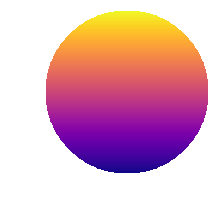

In [12]:
map.show()

As you can verify on [Wikipedia](https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics), the spherical harmonic $Y_{1,-1}$ in Cartesian coordinates is simply some constant times $y$, which is what we are seeing here: a uniform gradient from negative flux at the south pole to positive flux at the north pole of the body.

## Applying rotations
One thing that `starry` allows us to do easily is rotate the base map. As an example, let's rotate the map 90 degrees about the *z*-axis:

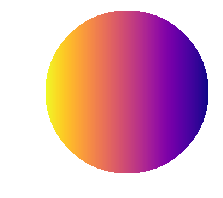

In [13]:
map.axis = [0, 0, 1]
map.rotate(theta=90)
map.show()

As you can probably guess, the `axis` attribute is a unit vector corresponding to the axis of rotation, which in this example we set to the *z* axis. The `theta` argument is the angle of rotation in **degrees**, measured counter-clockwise as we stare down the axis of rotation. If we print the `Map` instance, we notice that the base map has changed:

In [15]:
print(map)
print(map.y)

<double precision map of degree 1 with one wavelength bin and no limb darkening>
[ 1.000000e+00  6.123234e-17  0.000000e+00 -1.000000e+00]


One of the many cool things about spherical harmonics is that rotation of a $Y_{lm}$ in 3D space about any axis results in a linear combination of $Y_{lm'}$s of the same degree $l$. In this case, the rotation transformed the map to  (negative) $Y_{1,1}$, which is just [proportional](https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics) to (negative) $x$.

Let's apply another 90-degree rotation to the map, this time about the $y$-axis:

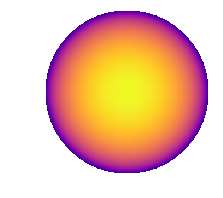

In [16]:
map.axis = [0, 1, 0]
map.rotate(theta=90)
map.show()

In [17]:
print(map)
print(map.y)

<double precision map of degree 1 with one wavelength bin and no limb darkening>
[ 1.000000e+00  6.123234e-17  1.000000e+00 -6.123234e-17]


Our map is now the spherical harmonic $Y_{1,0}$, which is [proportional](https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics) to $z$. Finally, let's apply one final rotation about the $x$ axis to return our map to the original orientation:

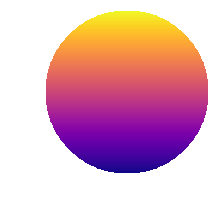

In [18]:
map.axis = [1, 0, 0]
map.rotate(theta=-90)
map.show()

In [19]:
print(map)
print(map.y)

<double precision map of degree 1 with one wavelength bin and no limb darkening>
[ 1.000000e+00  1.000000e+00 -0.000000e+00 -6.123234e-17]


## Computing phase curves
What we really would like to do is compute light curves. So let's get to it. Everything you need is in the `flux` method:

```python
def flux(self, theta=0, xo=0, yo=0, ro=0, gradient=False, numerical=False):
    ...
```

As before, `theta` defines the rotation angle of the map. The parameters `xo`, `yo`, and `ro` define the location and size of the occulting body (if any) relative to the `Map` object. `xo` and `yo` are the location of the center of the occultor and `ro` is its radius, all measured in units of the `Map` object's radius (=1). By the way, `theta`, `xo`, `yo`, and `ro` can all be either scalars or vectors. If more than one is a vector, their sizes must (obviously) match.

To start, let's simply compute some phase curves, with no occultations. We will vary `theta` between 0 and 360 degrees. Let's create two `theta` grids: a fine one, for the analytic calculations, and a coarse one, for the numerical calculations, so we can compare the results.

In [20]:
theta = np.linspace(0, 360, 100, endpoint=False)
theta_num = np.linspace(0, 360, 20, endpoint=False)

Let's rotate our map about the $x$-axis:

In [21]:
map.axis = [1, 0, 0]
F = map.flux(theta=theta)

Let's do the same calculation numerically:

In [22]:
F_num = map.flux(theta=theta_num, numerical=True)

Compare the results:

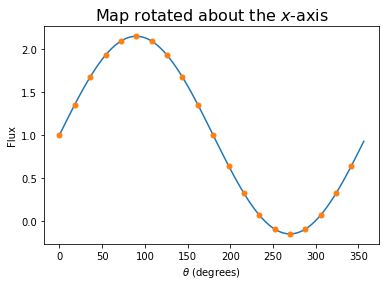

In [25]:
fig, ax = pl.subplots(1)
ax.plot(theta, F);
ax.plot(theta_num, F_num, '.', ms=10);
ax.set_xlabel(r'$\theta$ (degrees)');
ax.set_ylabel(r'Flux');
ax.set_title(r'Map rotated about the $x$-axis', fontsize=16);

Rotation of $Y_{-1,1}$ about either the $y$ axis or the $z$ axis results in no phase variation because of its symmetry. So let's look at a higher order spherical harmonic just for fun:

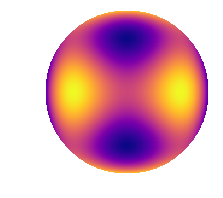

<double precision map of degree 4 with one wavelength bin and no limb darkening>
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0.]


In [26]:
map = starry.Map(4)
map[4, 2] = 1
map.show()
print(map)
print(map.y)

Let's rotate it about all three principal axes and look at its phase curves.

In [27]:
map.axis = [1, 0, 0]
Fx = map.flux(theta=theta)
Fx_num = map.flux(theta=theta_num, numerical=True)

map.axis = [0, 1, 0]
Fy = map.flux(theta=theta)
Fy_num = map.flux(theta=theta_num, numerical=True)

map.axis = [0, 0, 1]
Fz = map.flux(theta=theta)
Fz_num = map.flux(theta=theta_num, numerical=True)

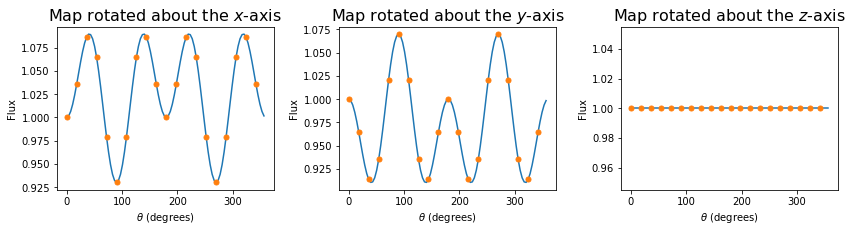

In [32]:
fig, ax = pl.subplots(1,3, figsize=(14,3))
fig.subplots_adjust(wspace=0.3)
axis = ['x', 'y', 'z']
for i, F, F_num in zip(range(3), [Fx, Fy, Fz], [Fx_num, Fy_num, Fz_num]):
    ax[i].plot(theta, F);
    ax[i].plot(theta_num, F_num, '.', ms=10);
    ax[i].set_xlabel(r'$\theta$ (degrees)');
    ax[i].set_ylabel(r'Flux');
    ax[i].set_title(r'Map rotated about the $%s$-axis' % axis[i], fontsize=16);

## Computing occultation light curves
These are just as easy!

Let's start with the following map:

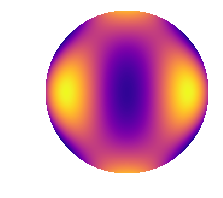

<double precision map of degree 4 with one wavelength bin and no limb darkening>
[ 2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  -0.5  0.   0.5  0.   0.5]


In [33]:
map = starry.Map(4)
map[0, 0] = 2
map[4, 0] = -0.5
map[4, 2] = 0.5
map[4, 4] = 0.5
map.show()
print(map)
print(map.y)

Consider an occultor of radius 0.1 moving along the $+x$ direction at $y_0 = 0.5$. Suppose that the occulted body rotates by an angle $\pi/8$ about the $y$-axis in the meantime. Computing the light curve is easy:

In [34]:
npts = 100
ro = 0.1
xo = np.linspace(-3,3, npts)
yo = 0.5
theta = np.linspace(0, 45, npts, endpoint=False)
map.axis = [0, 1, 0]
F = map.flux(theta=theta, xo=xo, yo=yo, ro=ro)

As before, let's compute the flux numerically as a check.

In [35]:
theta_num = np.linspace(0, 45, 50, endpoint=False)
xo_num = np.linspace(-3, 3, 50)
F_num = map.flux(theta=theta_num, xo=xo_num, yo=yo, ro=ro, numerical=True)

Here's the rather odd-looking light curve:

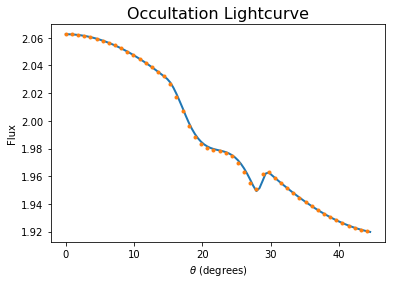

In [36]:
fig, ax = pl.subplots(1)
ax.plot(theta, F, lw=2);
ax.plot(theta_num, F_num, '.', ms=6);
ax.set_xlabel(r'$\theta$ (degrees)');
ax.set_ylabel(r'Flux');
ax.set_title(r'Occultation Lightcurve', fontsize=16);